In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from datetime import datetime

import project3_utilities as p3utils

In [2]:
ticker_symbol = input("Choose a stock ticker symbol: ")

# Capture the runtime so we can use it for reference later, that way when
# the model and the other outputs are saved, they have a common reference.
unixtime = int(datetime.now().timestamp())
print("The Unixtime ID of this run is: ", unixtime)

# Pull the stock data from Yahoo! Finance
stock_df = yf.Ticker(ticker_symbol).history(period='max')
display(stock_df.head())

# Because I'm paranoid about getting API banned, write this data to a file.
stock_df.to_csv(f'Stock_Data/{ticker_symbol}-YahooData-{unixtime}.csv')

# Load the data
#stock_df = pd.read_csv('Stock_Data/TSLA-YahooData-1722104572.csv')

The Unixtime ID of this run is:  1722299645


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,41.963766,44.907717,37.922072,38.151600,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.455086,36.584820,32.932326,33.960213,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.543127,33.521117,30.876552,30.936428,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.305670,32.433352,31.295691,31.934378,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.882431,33.141896,31.704851,32.962265,50237200,0.0,0.0


In [3]:
# Get the predictions
(predictions, model) = p3utils.get_LSTM_predictions(df=stock_df, 
                                                    train_test_split=0.8, 
                                                    window_size=7,
                                                    batch_size=5,
                                                    epochs=1)
model.summary()

# Save the model
model.save(f'Saved_Models/{ticker_symbol}-Model-{unixtime}.keras')


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 64)          │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,741 (643.52 KB)

 Trainable params: 54,913 (214.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 109,828 (429.02 KB)

In [4]:
# Now calculate buy/sell, and add both predictions and buy/sell to the original df.
stock_df = p3utils.generate_buy_sell(stock_df, predictions)
display(stock_df.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Predictions,Buy_Sell
Date,,,,,,,,,
2024-07-23 00:00:00-04:00,489.839996,495.220001,487.720001,488.690002,9455500,0.0,0.0,476.261993,BUY
2024-07-24 00:00:00-04:00,472.309998,476.299988,460.579987,461.269989,17649700,0.0,0.0,474.543152,SELL
2024-07-25 00:00:00-04:00,463.260010,463.549988,442.649994,453.410004,18240500,0.0,0.0,471.855225,SELL
2024-07-26 00:00:00-04:00,464.200012,469.769989,459.420013,465.700012,14209300,0.0,0.0,468.137665,BUY
2024-07-29 00:00:00-04:00,470.434998,473.959991,465.019989,465.709991,10526831,0.0,0.0,467.148407,BUY


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Predictions,Buy_Sell
Date,,,,,,,,,
2012-05-18 00:00:00-04:00,41.963766,44.907717,37.922072,38.151600,573576400,0.0,0.0,None,None
2012-05-21 00:00:00-04:00,36.455086,36.584820,32.932326,33.960213,168192700,0.0,0.0,None,SELL
2012-05-22 00:00:00-04:00,32.543127,33.521117,30.876552,30.936428,101786600,0.0,0.0,None,SELL
2012-05-23 00:00:00-04:00,31.305670,32.433352,31.295691,31.934378,73600000,0.0,0.0,None,BUY
2012-05-24 00:00:00-04:00,32.882431,33.141896,31.704851,32.962265,50237200,0.0,0.0,None,BUY


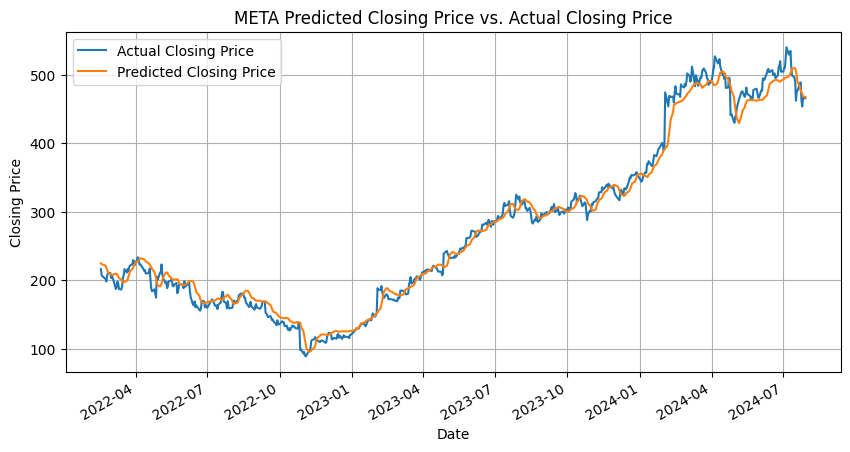

In [5]:
display(stock_df.head())
# Plot the predictions
p3utils.plot_predictions(df=stock_df, 
                 ticker_symbol=ticker_symbol,
                 show_all=False).show()

In [6]:
# Now test if the model worked:
score = p3utils.score_the_model(stock_df, "2024-06-01", "2024-06-30")
print(score)


13.633784651245719


In [7]:
# Finally, let's write this data to a file for reference later
stock_df.to_csv(f'Saved_Predictions/{ticker_symbol}-Predictions-{unixtime}.csv')